   area  bedrooms   price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900
Mean Squared Error on All Data: 4205919178.0929117
Root Mean Squared Error on All Data: 64853.05835573918
R^2 Score on All Data: 0.7251449526103714


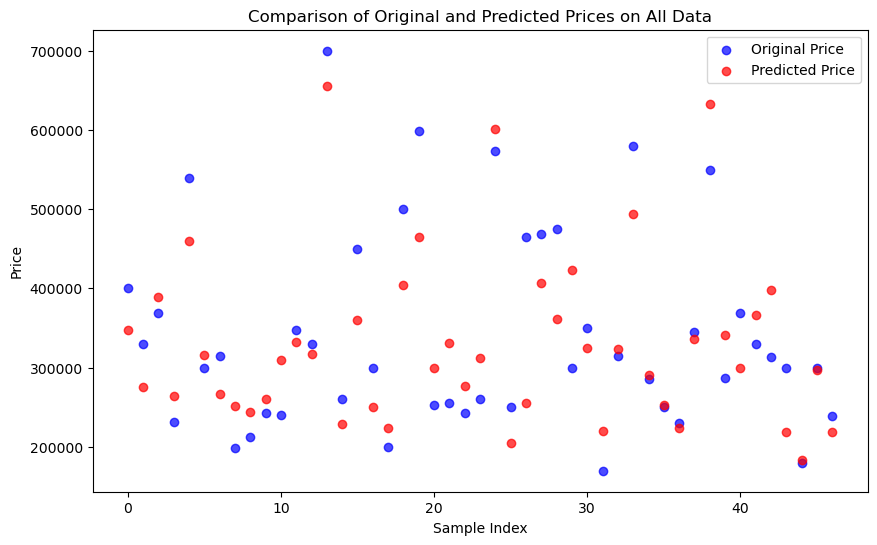

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error, r2_score


file_path = 'data/multiple_featuresGD.txt'
# 读取数据，假定列标题在第一行
df = pd.read_csv(file_path, header=0)
# 显示前几行数据以确认正确读取
print(df.head())

# 预处理数据
# 分离特征和目标变量
X = df.drop("price", axis=1)
y = df["price"]

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# 初始化模型
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 模型评分
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

train_score, test_score
# 使用全部数据进行预测，以评估模型的性能
predict_price_all = model.predict(X_scaled)

# 计算全数据集的 MSE
mse_all = mean_squared_error(y, predict_price_all)

# 计算全数据集的 RMSE
rmse_all = np.sqrt(mse_all)

# 计算全数据集的 R^2 Score
r2_all = r2_score(y, predict_price_all)

print('Mean Squared Error on All Data:', mse_all)
print('Root Mean Squared Error on All Data:', rmse_all)
print('R^2 Score on All Data:', r2_all)

# 绘制全数据集的原始价格与预测价格对比图
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Original Price', alpha=0.7)
plt.scatter(range(len(predict_price_all)), predict_price_all, color='red', label='Predicted Price', alpha=0.7)
plt.title('Comparison of Original and Predicted Prices on All Data')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()